## Goal of the Competition

Welcome to the "Predictive Medicine in Bioinformatics" competition hosted by InVitro Cell Research, LLC (ICR). In this notebook, we will embark on a data science journey to develop a predictive model capable of detecting three medical conditions based on measurements of health characteristics.

*Objective*:

The primary objective of this competition is to predict whether a person has any of three medical conditions (Class 1) or none of the three medical conditions (Class 0). By utilizing predictive models, we aim to streamline the process of determining these medical conditions, which traditionally requires invasive and time-consuming data collection from patients. Our predictive model will leverage measurements of key health characteristics to make reliable and private predictions, thus potentially revolutionizing the field of bioinformatics.

*Context:*

Aging is a significant risk factor for various health issues, including heart disease, dementia, hearing loss, and arthritis. Bioinformatics, an emerging field, focuses on finding interventions to slow and reverse biological aging and prevent age-related ailments. In this data science competition, we will explore how data-driven approaches can contribute to solving critical problems in bioinformatics, even when dealing with small datasets.

*About the Competition Host (InVitro Cell Research, LLC):*

Founded in 2015, InVitro Cell Research, LLC (ICR) is a pioneering company dedicated to regenerative and preventive personalized medicine. Situated in the greater New York City area, ICR boasts state-of-the-art research facilities and a team of dedicated scientists who shape their mission of researching how to repair aging in people quickly.

*Conclusion:*

This competition is a thrilling opportunity to explore new methods for solving complex bioinformatics problems using diverse data. Your contributions can significantly impact the field and help researchers understand the relationship between health characteristics and potential patient conditions. Let's get started and develop an innovative and robust predictive model to improve the lives of countless individuals through personalized medicine!

In [1]:
# Importing required libraries:

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pyplot as plt
from colorama import Style, Fore
import plotly.express as px
import plotly.io as pio

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import warnings

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


!pip install --upgrade threadpoolctl
!pip install --upgrade scikit-learn imbalanced-learn

In [3]:
import missingno as msno
import json

pd.set_option('display.max_columns', None): This sets the maximum number of columns to display in pandas DataFrames to None, which means all columns will be displayed. 

pd.set_option('display.max_rows', None): This sets the maximum number of rows to display in pandas DataFrames to None, which means all rows will be displayed.

warnings.filterwarnings("ignore"): This line suppresses warnings in your code. It filters out warning messages and prevents them from being displayed in the output. It can be useful if you want to hide warnings that may not be relevant or distracting for your specific use case.

In [4]:
# setting no limit on the number of columns & rows displayed

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#ignoring unnecessary warnings
warnings.filterwarnings("ignore")

In [5]:
#importing all the datsets and assigning respective dataframes

train_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
greeks_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')

In [6]:
#checking shape of each dataset

print('Shape of train dataset:', train_df.shape)
print('Shape of test dataset:', test_df.shape)
print('Shape of greeks dataset:', greeks_df.shape)

Shape of train dataset: (617, 58)
Shape of test dataset: (5, 57)
Shape of greeks dataset: (617, 6)


### Exploratory Data Analysis: Greeks Dataset:

In [7]:
# Examining the greeks dataset

greeks_df.head()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


In [8]:
# Statistical summary of string (object) data in train dataset  

greeks_df.describe(include='object').T

,count,unique,top,freq
Id,617,617,000ff2bfdfe9,1
Alpha,617,4,A,509
Beta,617,3,C,407
Gamma,617,8,M,445
Delta,617,4,B,456
Epsilon,617,198,Unknown,144


In [9]:
# Checking datatypes & null values: greeks dataset

greeks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       617 non-null    object
 1   Alpha    617 non-null    object
 2   Beta     617 non-null    object
 3   Gamma    617 non-null    object
 4   Delta    617 non-null    object
 5   Epsilon  617 non-null    object
dtypes: object(6)
memory usage: 29.0+ KB


In [10]:
# Replacing 'unknowns' as null values in greeks dataset

greeks_df = greeks_df.replace("Unknown", pd.NA)

In [11]:
greeks_df.head(8)

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,<NA>
2,013f2bd269f5,A,C,M,B,<NA>
3,043ac50845d5,A,C,M,B,<NA>
4,044fb8a146ec,D,B,F,B,3/25/2020
5,04517a3c90bd,A,C,M,B,10/1/2019
6,049232ca8356,A,C,M,B,5/29/2019
7,057287f2da6d,A,C,M,B,4/24/2019


In [12]:
# Calculate missing values for each column (greeks dataset)

print(greeks_df.isnull().sum())

Id           0
Alpha        0
Beta         0
Gamma        0
Delta        0
Epsilon    144
dtype: int64


In [13]:
# Import datatime module to convert the date into number of days

from datetime import datetime

In [14]:
# Converting epsilon column to datatime format

# The errors='coerce' argument is used to handle any values that cannot be converted to datetime format.
# When encountering such values, the 'coerce' option replaces them with *NaT (Not a Time) values*,
# effectively representing missing or invalid dates.

greeks_df['Epsilon'] = pd.to_datetime(greeks_df['Epsilon'], errors='coerce')

In [15]:
greeks_df.head(8)

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,2019-03-19
1,007255e47698,A,C,M,B,NaT
2,013f2bd269f5,A,C,M,B,NaT
3,043ac50845d5,A,C,M,B,NaT
4,044fb8a146ec,D,B,F,B,2020-03-25
5,04517a3c90bd,A,C,M,B,2019-10-01
6,049232ca8356,A,C,M,B,2019-05-29
7,057287f2da6d,A,C,M,B,2019-04-24


In [16]:
# Filling the NaT values with current date

greeks_df['Epsilon'].fillna(pd.to_datetime('today'), inplace=True)

In [17]:
greeks_df.head(8)

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,2019-03-19 00:00:00.000000
1,007255e47698,A,C,M,B,2023-08-10 05:50:17.443719
2,013f2bd269f5,A,C,M,B,2023-08-10 05:50:17.443719
3,043ac50845d5,A,C,M,B,2023-08-10 05:50:17.443719
4,044fb8a146ec,D,B,F,B,2020-03-25 00:00:00.000000
5,04517a3c90bd,A,C,M,B,2019-10-01 00:00:00.000000
6,049232ca8356,A,C,M,B,2019-05-29 00:00:00.000000
7,057287f2da6d,A,C,M,B,2019-04-24 00:00:00.000000


In [18]:
# New column specifying number of days w.r.t most recent date

greeks_df['Days_Epsilon'] = (pd.to_datetime('today') - greeks_df['Epsilon']).dt.days

In [19]:
greeks_df.head(8)

,Id,Alpha,Beta,Gamma,Delta,Epsilon,Days_Epsilon
0,000ff2bfdfe9,B,C,G,D,2019-03-19 00:00:00.000000,1605
1,007255e47698,A,C,M,B,2023-08-10 05:50:17.443719,0
2,013f2bd269f5,A,C,M,B,2023-08-10 05:50:17.443719,0
3,043ac50845d5,A,C,M,B,2023-08-10 05:50:17.443719,0
4,044fb8a146ec,D,B,F,B,2020-03-25 00:00:00.000000,1233
5,04517a3c90bd,A,C,M,B,2019-10-01 00:00:00.000000,1409
6,049232ca8356,A,C,M,B,2019-05-29 00:00:00.000000,1534
7,057287f2da6d,A,C,M,B,2019-04-24 00:00:00.000000,1569


In [20]:
# Replacing the '0' values in Days_Epsilon' column with median value.

median_days = greeks_df.loc[greeks_df["Days_Epsilon"] != 0, "Days_Epsilon"].median()

greeks_df.loc[greeks_df["Days_Epsilon"] == 0, "Days_Epsilon"] = median_days

In [21]:
greeks_df.head(8)

,Id,Alpha,Beta,Gamma,Delta,Epsilon,Days_Epsilon
0,000ff2bfdfe9,B,C,G,D,2019-03-19 00:00:00.000000,1605
1,007255e47698,A,C,M,B,2023-08-10 05:50:17.443719,1473
2,013f2bd269f5,A,C,M,B,2023-08-10 05:50:17.443719,1473
3,043ac50845d5,A,C,M,B,2023-08-10 05:50:17.443719,1473
4,044fb8a146ec,D,B,F,B,2020-03-25 00:00:00.000000,1233
5,04517a3c90bd,A,C,M,B,2019-10-01 00:00:00.000000,1409
6,049232ca8356,A,C,M,B,2019-05-29 00:00:00.000000,1534
7,057287f2da6d,A,C,M,B,2019-04-24 00:00:00.000000,1569


In [22]:
# Greeks dataset with selected columns (dropping epsilon column)

greeks_df = greeks_df[['Id', 'Alpha', 'Beta', 'Gamma', 'Delta', 'Days_Epsilon']]
greeks_df.head(8)

,Id,Alpha,Beta,Gamma,Delta,Days_Epsilon
0,000ff2bfdfe9,B,C,G,D,1605
1,007255e47698,A,C,M,B,1473
2,013f2bd269f5,A,C,M,B,1473
3,043ac50845d5,A,C,M,B,1473
4,044fb8a146ec,D,B,F,B,1233
5,04517a3c90bd,A,C,M,B,1409
6,049232ca8356,A,C,M,B,1534
7,057287f2da6d,A,C,M,B,1569


In [23]:
# Checking missing values for each column (greeks dataset)

print(greeks_df.isnull().sum())

Id              0
Alpha           0
Beta            0
Gamma           0
Delta           0
Days_Epsilon    0
dtype: int64


In [24]:
# Check for duplicate rows in the DataFrame (greeks dataset)
duplicates_g = greeks_df.duplicated()

# Count the number of duplicate rows
num_duplicates_g = duplicates_g.sum()

# Print the duplicate rows and the count
print("Duplicate Rows:")
print(f"Number of Duplicate Rows: {num_duplicates_g}")

Duplicate Rows:
Number of Duplicate Rows: 0


In [25]:
# Statistical summary of numerical data in train dataset

greeks_df.describe()

,Days_Epsilon
count,617.000000
mean,1450.727715
std,327.708609
min,1045.000000
25%,1198.000000
50%,1473.000000
75%,1569.000000
max,4102.000000


In [26]:
# One-hot encoding for the categorical coulmns for the Greeks dataset 
# (One-hot encoding because it has nominal variables without an inherent order)

one_hot_encoded_greeks_df = pd.get_dummies(greeks_df, columns=['Alpha', 'Beta', 'Gamma', 'Delta'])
one_hot_encoded_greeks_df.head(8)

,Id,Days_Epsilon,Alpha_A,Alpha_B,Alpha_D,Alpha_G,Beta_A,Beta_B,Beta_C,Gamma_A,Gamma_B,Gamma_E,Gamma_F,Gamma_G,Gamma_H,Gamma_M,Gamma_N,Delta_A,Delta_B,Delta_C,Delta_D
0,000ff2bfdfe9,1605,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,007255e47698,1473,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,013f2bd269f5,1473,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,043ac50845d5,1473,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,044fb8a146ec,1233,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
5,04517a3c90bd,1409,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
6,049232ca8356,1534,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
7,057287f2da6d,1569,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [27]:
# Now greeks dataset has all the numerical columns except 'id'

greeks_df = one_hot_encoded_greeks_df
greeks_df.head(8)

,Id,Days_Epsilon,Alpha_A,Alpha_B,Alpha_D,Alpha_G,Beta_A,Beta_B,Beta_C,Gamma_A,Gamma_B,Gamma_E,Gamma_F,Gamma_G,Gamma_H,Gamma_M,Gamma_N,Delta_A,Delta_B,Delta_C,Delta_D
0,000ff2bfdfe9,1605,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,007255e47698,1473,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,013f2bd269f5,1473,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,043ac50845d5,1473,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,044fb8a146ec,1233,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
5,04517a3c90bd,1409,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
6,049232ca8356,1534,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
7,057287f2da6d,1569,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


### Exploratory Data Analysis: Training dataset

In [28]:
# Examining the train dataset

train_df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,B,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,A,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,B,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,B,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,B,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [29]:
# Statistical summary of numerical data in train dataset

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AB,617.0,0.477149,0.468388,0.081187,0.252107,0.354659,0.559763,6.161666
AF,617.0,3502.013221,2300.322717,192.593280,2197.345480,3120.318960,4361.637390,28688.187660
AH,617.0,118.624513,127.838950,85.200147,85.200147,85.200147,113.739540,1910.123198
AM,617.0,38.968552,69.728226,3.177522,12.270314,20.533110,39.139886,630.518230
AR,617.0,10.128242,10.518877,8.138688,8.138688,8.138688,8.138688,178.943634
AX,617.0,5.545576,2.551696,0.699861,4.128294,5.031912,6.431634,38.270880
AY,617.0,0.060320,0.416817,0.025578,0.025578,0.025578,0.036845,10.315851
AZ,617.0,10.566447,4.350645,3.396778,8.129580,10.461320,12.969516,38.971568
BC,617.0,8.053012,65.166943,1.229900,1.229900,1.229900,5.081244,1463.693448
BD,617.0,5350.388655,3021.326641,1693.624320,4155.702870,4997.960730,6035.885700,53060.599240


In [30]:
# Statistical summary of string (object) data in train dataset

train_df.describe(include='object').T

,count,unique,top,freq
Id,617,617,000ff2bfdfe9,1
EJ,617,2,B,395


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

<Axes: >

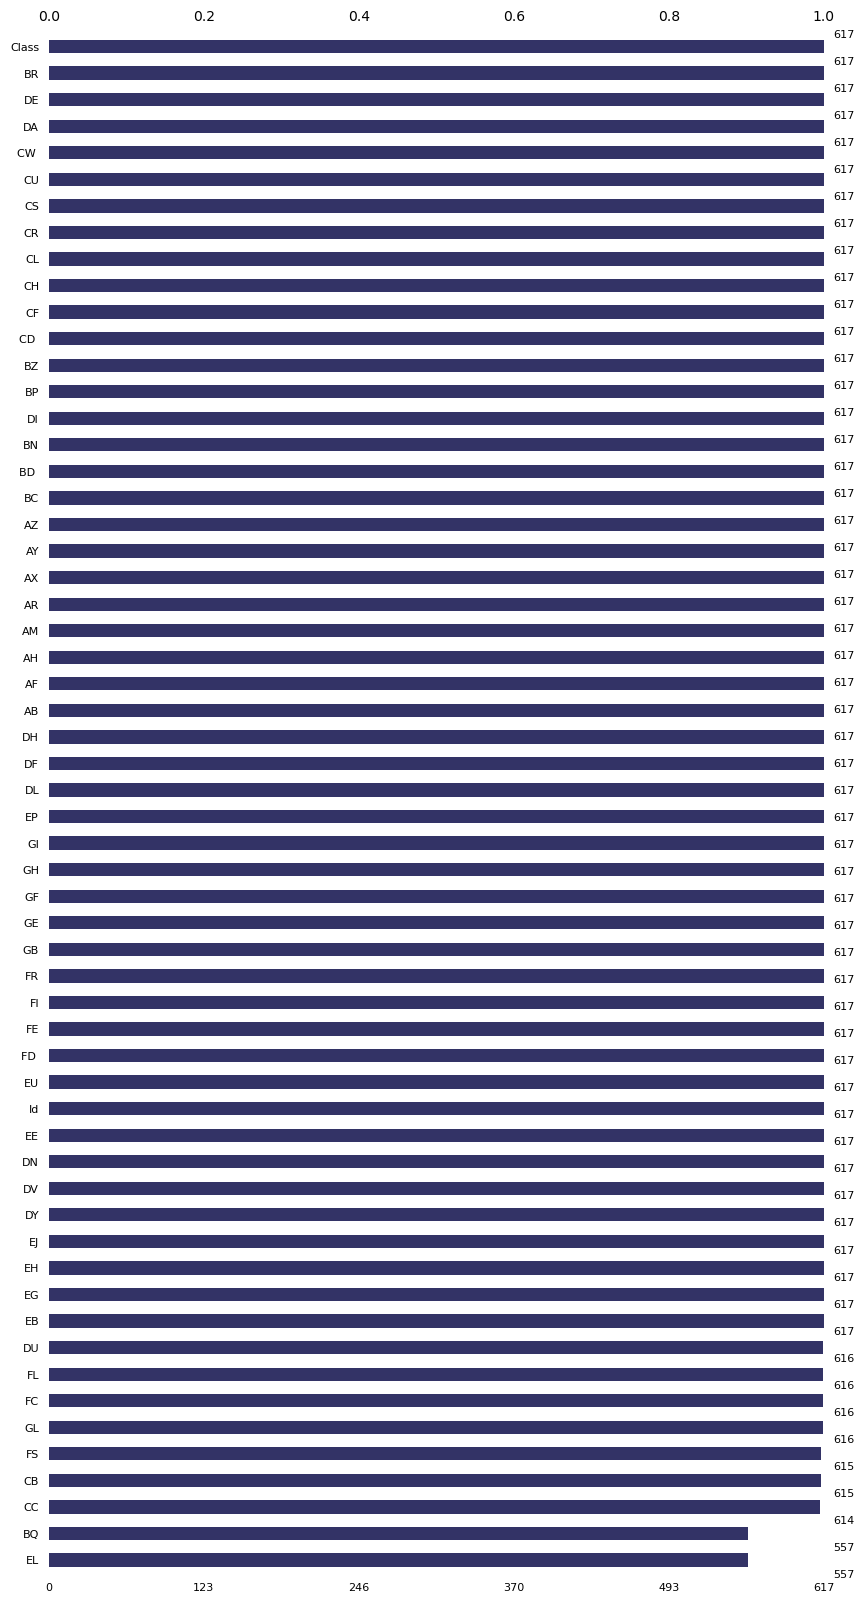

In [32]:
# Bar graph representing the null values:

msno.bar(train_df, figsize = (10, 20), fontsize = 8, sort='ascending', color = "#333366",label_rotation=0)

In [33]:
# Calculate missing values for each column
missing_values = train_df.isnull().sum()
missing_train = missing_values[missing_values > 0]

# Print columns with missing values
print(missing_train)

BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64


In [34]:
import pandas as pd
from sklearn.impute import KNNImputer

# Assuming train_df is your DataFrame with missing values

# Separate numerical and categorical columns
numerical_columns = train_df.select_dtypes(include='number').columns
categorical_columns = train_df.select_dtypes(include='object').columns

# Impute missing values in numerical columns using KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the value of n_neighbors as per your needs
imputed_numerical_data = knn_imputer.fit_transform(train_df[numerical_columns])
imputed_numerical_df = pd.DataFrame(imputed_numerical_data, columns=numerical_columns)

# Impute missing values in categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
imputed_categorical_data = categorical_imputer.fit_transform(train_df[categorical_columns])
imputed_categorical_df = pd.DataFrame(imputed_categorical_data, columns=categorical_columns)

# Combine the imputed numerical and categorical DataFrames
imputed_train_df = pd.concat([imputed_numerical_df, imputed_categorical_df], axis=1)

In [35]:
#checking the missing values (deleted later on)
imputed_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      617 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      617 non-null    float64
 16  CC      617 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

In [36]:
# Calculate missing values for each column
missing_values = imputed_train_df.isnull().sum()
missing_train = missing_values[missing_values > 0]

# Print columns with missing values
print(missing_train)

Series([], dtype: int64)


In [37]:
# Checking the imputed dataframe of train dataset

imputed_train_df.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class,Id,EJ
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1.0,000ff2bfdfe9,B
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0.0,007255e47698,A
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0.0,013f2bd269f5,B
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0.0,043ac50845d5,B
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1.0,044fb8a146ec,B


In [38]:
# Assign the new DataFrame with imputed values to train_df

train_df = imputed_train_df

In [39]:
# Check for duplicate rows in the DataFrame
duplicates_tr = train_df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates_tr.sum()

# Print the duplicate rows and the count
print("Duplicate Rows:")
print(f"Number of Duplicate Rows: {num_duplicates}")


Duplicate Rows:
Number of Duplicate Rows: 0


In [40]:
# Assigning columns according to datatypes.

numerical_variables = train_df.select_dtypes(exclude='object').columns
categorical_variables = train_df.select_dtypes(include='object').columns

print ('Numerical columns of train dataset:', numerical_variables)
print ('Categorical columns of train dataset:', categorical_variables)

Numerical columns of train dataset: Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FR',
       'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')
Categorical columns of train dataset: Index(['Id', 'EJ'], dtype='object')


### Visualizing numerical variables

In [41]:
# Plotting box plots using plotly.express 

def create_boxplot(data,x,y):
    fig = px.box(data, x=x, y=y, color = x, title = f"Box Plots\n{x} vs {y}")
    fig.show()

for feature in numerical_variables:
    create_boxplot(data=train_df,y=feature,x="Class")

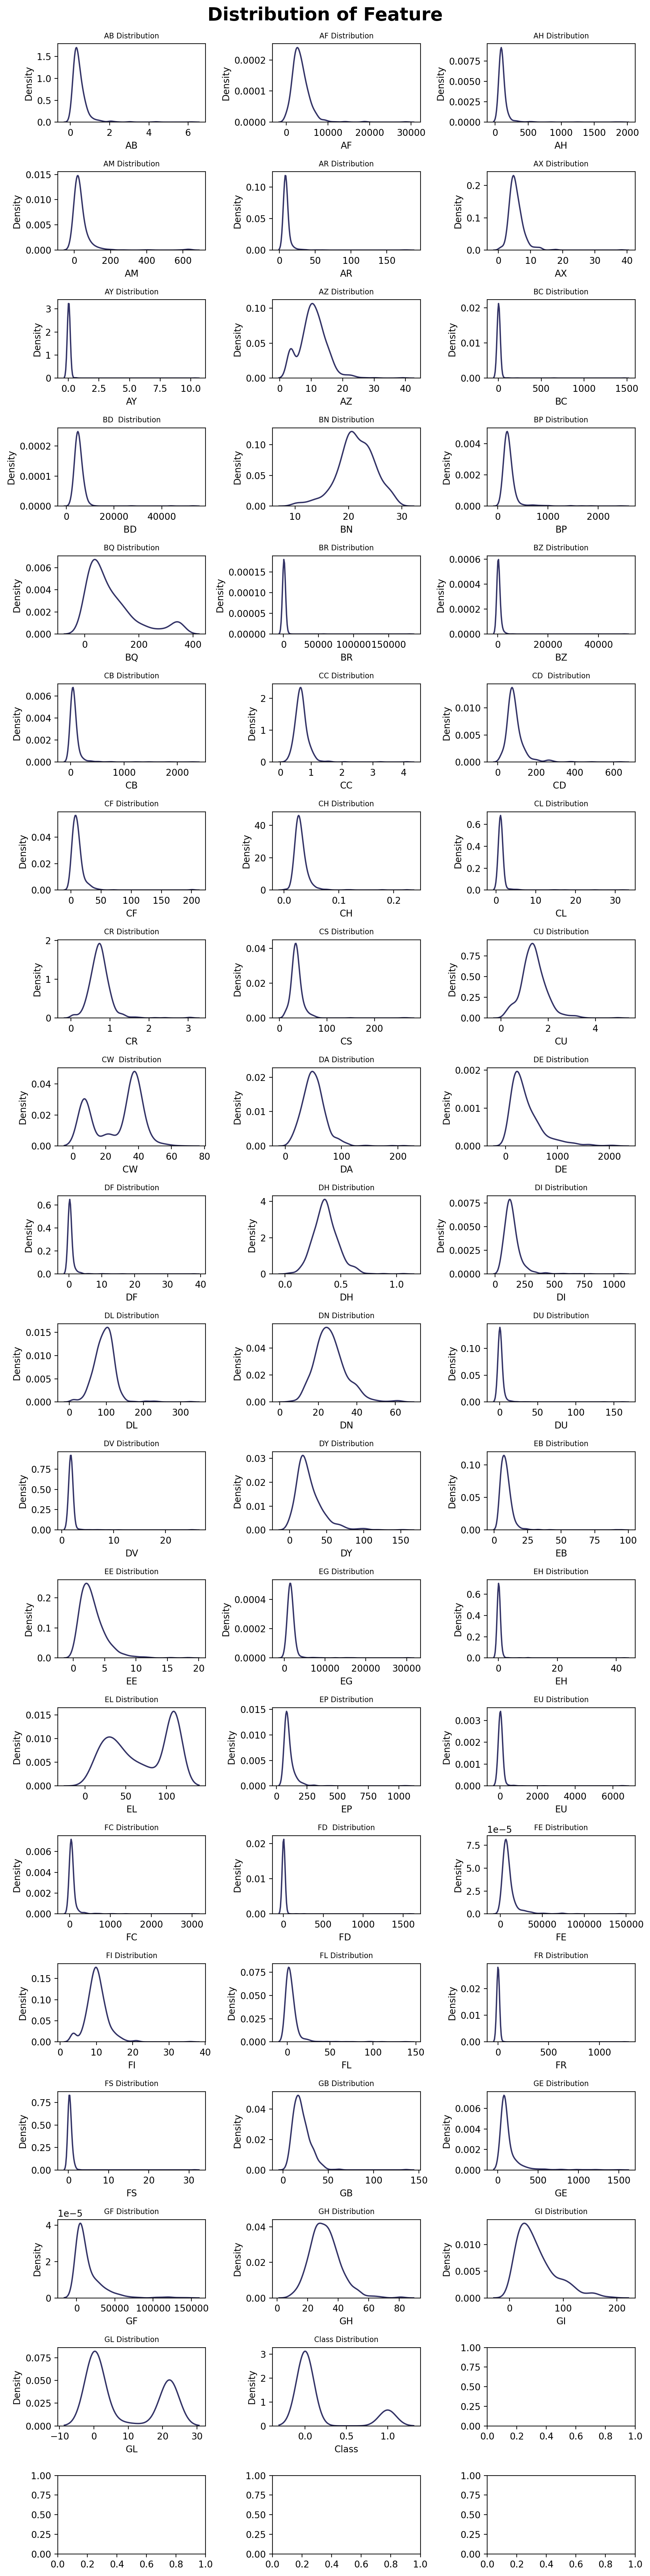

In [42]:
# Distribution plot of each feature of train dataset:

# Number of features to plot
num_plots = len(numerical_variables)

# Calculate the number of rows needed based on the number of plots
num_rows = (num_plots + 4) // 3  

# Create a figure and a grid of subplots
fig, ax = plt.subplots(num_rows, 3, figsize=(10, num_rows * 2), dpi=200)

# Flatten the subplot grid into a 1-dimensional array
ax = ax.flatten()

for i, column in enumerate(numerical_variables):
 if i < num_plots:  # Only plot if there are available subplots
    sns.kdeplot(train_df[column], ax=ax[i], color="#333366")
    
    # Set the subplot title
    ax[i].set_title(f'{column} Distribution', size=8)


# Set the main title for the figure    
fig.suptitle('Distribution of Feature\n\n', fontsize=20, fontweight='bold')
plt.tight_layout()

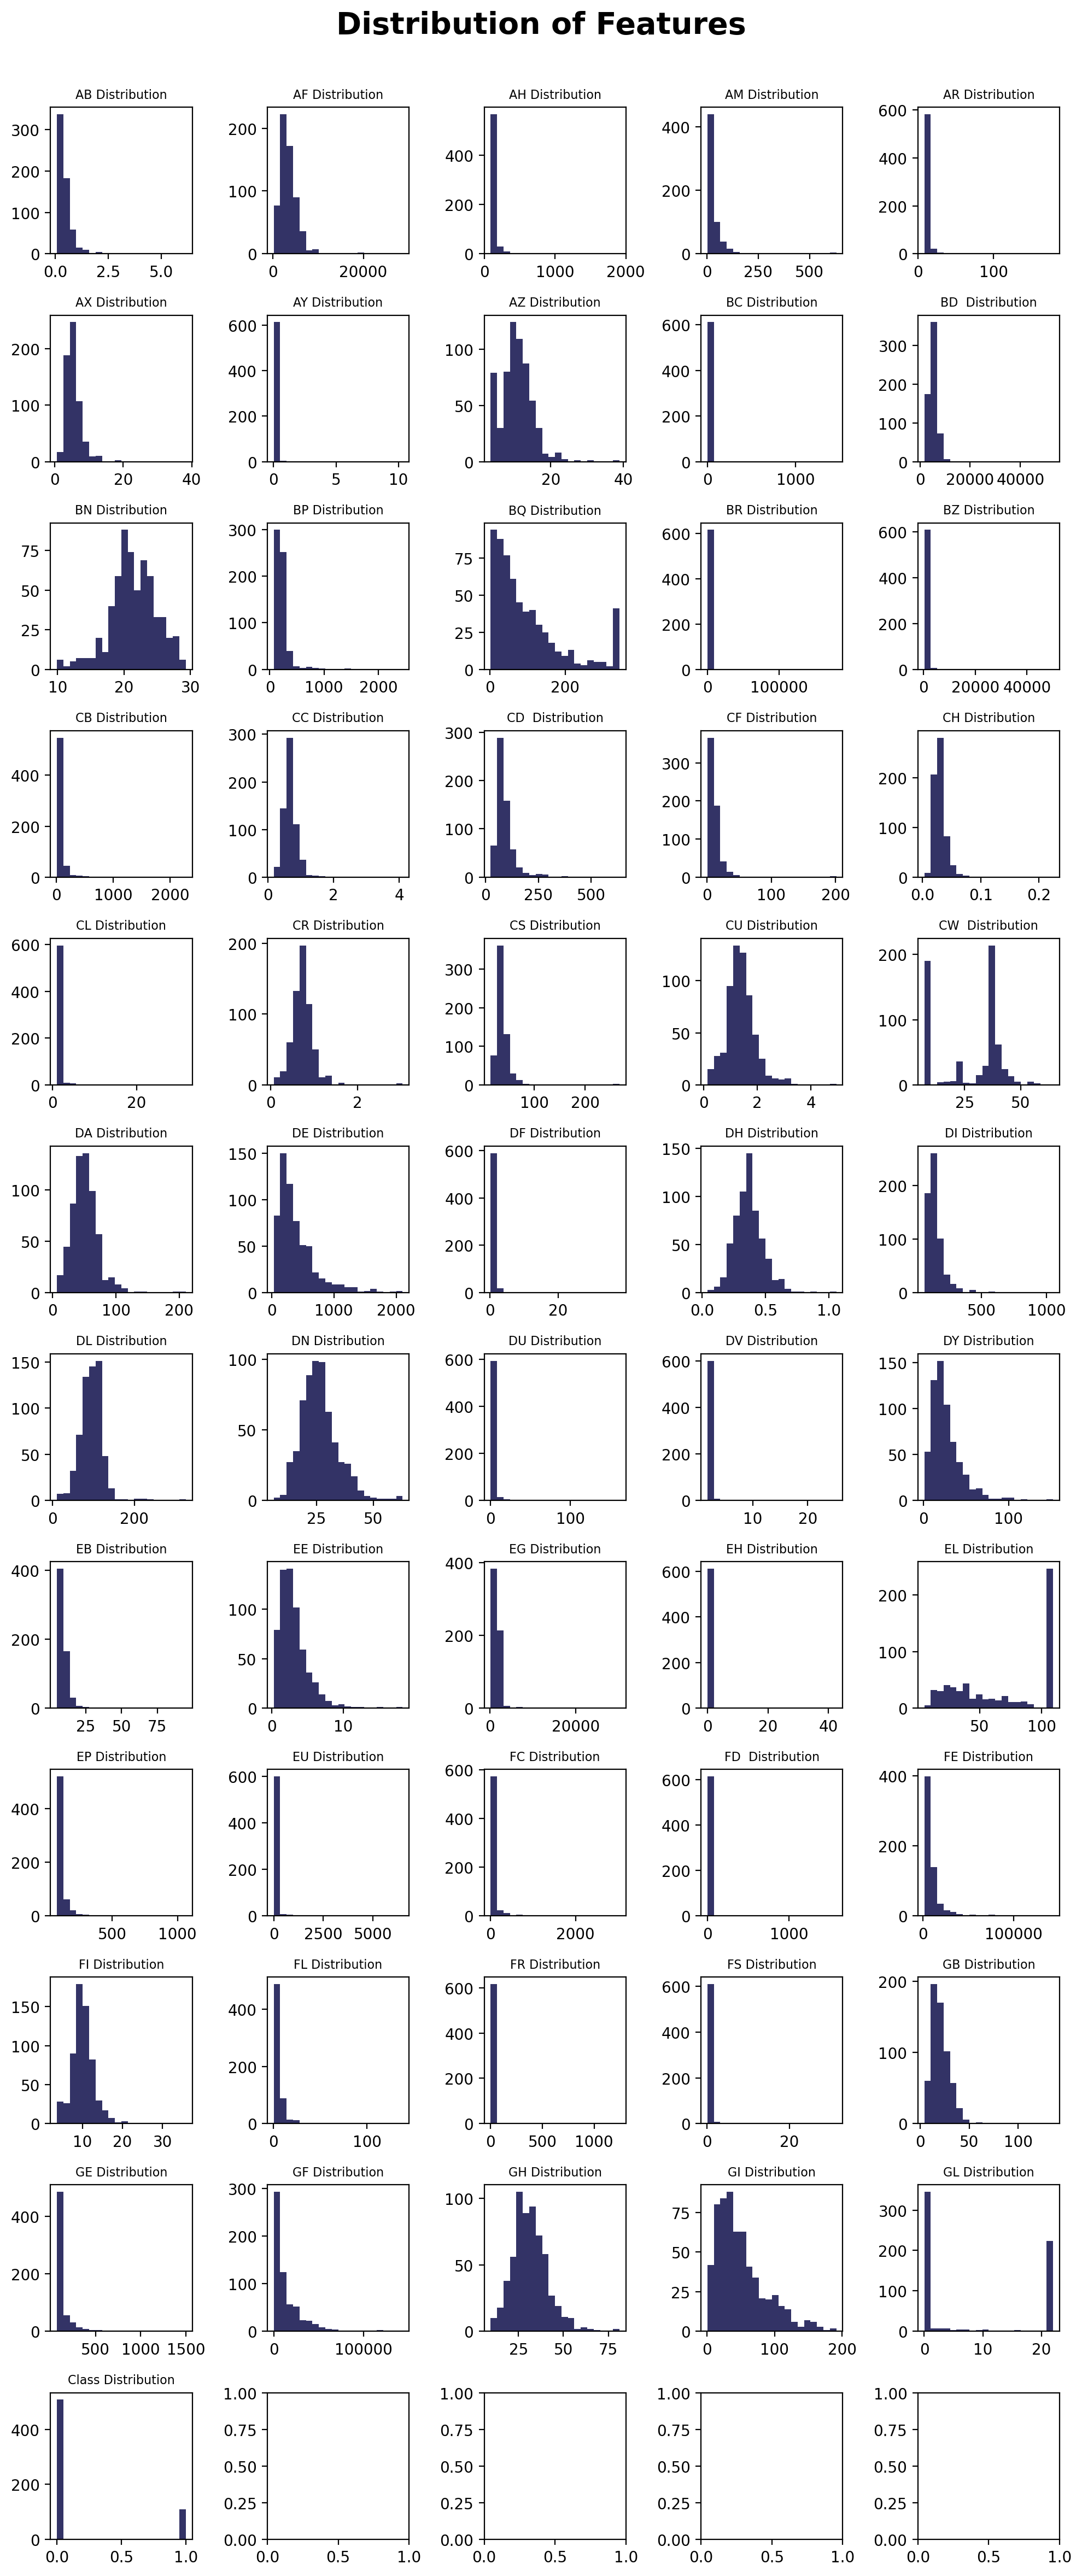

In [43]:
num_plots = len(numerical_variables)  # Number of features to plot
num_rows = (num_plots + 4) // 5  # Calculate the number of rows needed based on the number of plots

# Create a figure and a grid of subplots
fig, ax = plt.subplots(num_rows, 5, figsize=(10, num_rows * 2), dpi=200)
ax = ax.flatten()  # Flatten the subplot grid into a 1-dimensional array

for i, column in enumerate(numerical_variables):
    if i < num_plots:  # Only plot if there are available subplots
        ax[i].hist(train_df[column], color="#333366", bins=20)
        ax[i].set_title(f'{column} Distribution', size=8)  # Set the subplot title

fig.suptitle('Distribution of Features\n\n', fontsize=20, fontweight='bold')  # Set the main title for the figure
plt.tight_layout()  # Adjust the spacing between subplots

In [44]:
train_df.head(8)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class,Id,EJ
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.238680,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1.0,000ff2bfdfe9,B
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.238680,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0.0,007255e47698,A
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.238680,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0.0,013f2bd269f5,B
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.238680,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0.0,043ac50845d5,B
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.238680,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1.0,044fb8a146ec,B
5,0.209377,2615.81430,85.200147,8.541526,8.138688,4.013127,0.025578,12.547282,1.229900,5237.54088,10.2399,148.487931,16.526120,642.325163,257.432377,18.382000,0.639460,80.667400,14.688030,0.016716,1.050225,0.857625,32.456996,1.390284,7.030640,55.22404,135.489250,0.238680,0.478275,135.317865,81.46312,31.731600,0.005518,1.74307,16.773128,4.926396,2.394414,866.382950,0.003042,109.125159,78.526968,3.828384,23.304960,0.296850,8517.278846,10.981896,0.173229,0.49706,1.164956,21.915512,72.611063,24177.595550,28.525186,82.527764,21.978000,0.0,04517a3c90bd,A
6,0.348249,1733.65412,85.200147,8.377385,15.312480,1.913544,0.025578,6.547778,1.229900,5710.46099,17.6550,143.646993,344.644105,719.725142,257.432377,38.455144,0.946323,78.304856,13.184256,0.033631,1.050225,0.610950,13.784111,2.786085,21.877508,19.21570,107.907985,1.318005,0.460510,176.625563,97.07586,44.506128,1.006962,1.74307,4.474032,4.926396,2.620150,1793.612375,0.097344,13.214487,78.526968,26.304948,48.266400,1.460502,3903.806766,10.777915,4.408484,0.86130,0.467337,17.8784

In [45]:
# Converting categorical columns in numerical by Label encoding:

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'EJ' column in the train dataset
train_df['EJ'] = label_encoder.fit_transform(train_df['EJ'])

# Print the encoded DataFrame
train_df.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class,Id,EJ
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1.0,000ff2bfdfe9,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0.0,007255e47698,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0.0,013f2bd269f5,1
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0.0,043ac50845d5,1
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1.0,044fb8a146ec,1


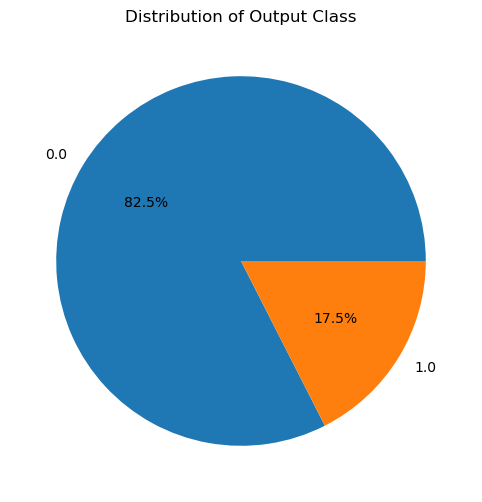

In [46]:
# Checking the distribution of 'Class' variable(output variable)
class_distribution = train_df['Class'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Output Class')
plt.show()

In [47]:
# Dropping the'Id' column

train_df = train_df.drop('Id', axis=1)

In [48]:
train_df.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class,EJ
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1.0,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0.0,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0.0,1
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0.0,1
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1.0,1


In [49]:
train_df.shape

(617, 57)

### Splitting train data into Training and Validation sets

In [50]:
# Split the dataframe into features (x) and target variable (y)

x = train_df.drop('Class', axis=1) # features
y = train_df['Class'] # Target variable

In [51]:
# Stratified Sampling: Stratified sampling is used when the dataset is imbalanced or when you want to ensure that each class
# is represented in both the training and test sets

In [52]:
# Splitting the train data into training & validation sets using stratified sampling

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.30, stratify=y, random_state=42)

In [53]:
# Print the shapes of the resulting datasets

print("x_train shape:", x_train.shape)
print("x_valid shape:", x_valid.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)

x_train shape: (431, 56)
x_valid shape: (186, 56)
y_train shape: (431,)
y_valid shape: (186,)


### Scaling the feature set (x) of training dataset using Standard Scaler

In [54]:
from sklearn.preprocessing import StandardScaler

# Assuming x_train and x_test are the feature sets

# Create the scaler object
scaler = StandardScaler()

# Fit the scaler on the training set
scaler.fit(x_train)

# Transform the training set
x_train_scaled = scaler.transform(x_train)

# Transform the testing set using the same scaler
x_valid_scaled = scaler.transform(x_valid)

In [55]:
# Converting scaled arrays to respective dataframes

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_valid_scaled = pd.DataFrame(x_valid_scaled, columns=x_valid.columns)

In [56]:
x_train_scaled.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,EJ
0,-0.578847,-0.813207,-0.246596,-0.485677,-0.189234,-0.950187,-0.084117,-0.250628,-0.106195,-0.611691,-0.946420,-0.725135,-0.991933,-0.231473,-0.130952,-0.437169,-0.551490,-0.739397,-0.221702,-0.917126,-0.166308,-0.656098,-0.209843,0.185218,-1.327523,-0.165398,-0.254580,-0.166785,0.736573,0.337447,-0.440000,-0.712331,-0.217917,-0.114165,-0.169187,-0.514413,-1.085553,-0.357101,-0.427051,-0.784791,-0.420340,-0.068096,-0.216354,-0.379963,3.917970,-0.002263,-0.480085,-0.065843,-0.116128,-0.501240,-0.254094,0.402761,-0.202064,0.897986,1.301265,-1.334408
1,0.154287,1.373691,-0.246596,-0.197105,-0.203506,-0.215006,-0.084117,-1.158915,-0.106195,-0.264544,0.268795,-0.347287,-1.016493,0.852010,-0.130952,-0.425427,0.131706,-0.641582,-0.404985,0.398658,-0.166308,-0.722531,0.164961,-0.008372,0.748316,0.751784,-0.809338,-0.181093,-1.038729,0.248368,-0.634861,-2.002368,-0.217917,-0.114165,3.881630,-0.369712,0.903865,-0.123023,-0.427051,1.102205,0.009418,-0.281041,0.050020,-0.379963,2.328843,1.330019,-0.480085,-0.052777,-0.173539,0.961042,-0.396663,-0.755450,0.118290,1.294184,1.301265,-1.334408
2,-0.527698,0.103716,-0.246596,-0.426589,-0.203506,0.612901,-0.038771,-1.739376,-0.106195,0.149485,0.876402,-0.211431,1.184260,-0.170499,0.260843,-0.228503,-1.510491,-0.390058,-0.133024,-0.637172,-0.166308,-0.273908,-0.609973,0.443338,-1.327523,0.507370,-0.895136,-0.181093,-0.211876,-0.391073,0.548620,-0.390940,0.011326,-0.114165,-0.060066,0.244356,-0.799612,-0.207139,0.445951,1.102205,0.192743,-0.304459,-0.412353,0.190773,4.684170,-0.672104,-0.006608,-0.045489,-0.054302,-1.012883,0.028176,-0.669144,-1.294994,-0.831437,-0.815500,0.749396
3,-0.433925,0.772965,-0.246596,-0.401710,-0.203506,-1.076029,-0.084117,-1.739376,-0.090624,0.796538,0.775134,0.620209,-0.997453,0.094638,0.034819,-0.218073,-0.037031,-0.960002,-0.677441,-1.253070,-0.166308,-0.856721,1.693993,-1.438786,-0.428232,2.004963,-0.855011,-0.181093,-1.306240,-0.114855,-0.594843,-1.648749,0.220964,-0.114165,-0.194122,0.775130,0.350235,0.185266,0.533880,-1.404094,-0.420340,0.044610,-0.313442,0.448904,2.767541,-0.986670,0.383630,-0.061318,-0.239782,-0.259681,-0.396663,-0.629923,-1.372102,-0.400550,-0.822730,0.749396
4,-0.050308,-0.519493,-0.183946,0.029572,-0.203506,0.616212,-0.084117,-1.046131,-0.106195,-0.942073,-0.440081,-0.635050,-0.750640,0.887792,-0.130952,-0.382460,-0.512117,0.115519,-0.053980,0.174695,-0.166308,0.421128,-1.506004,-0.793486,-1.327523,-1.299858,0.858791,-0.181093,-0.673941,-0.616229,-0.127236,-0.202941,-0.125521,-0.114165,0.563308,-0.698026,0.565198,-0.837864,-0.295159,-0.791123,-0.420340,-0.230367,-0.399638,-0.328584,-0.578600,-1.069938,-0.225156,-0.065843,-0.239782,-0.908594,-0.396663,-0.740521,2.121993,-1.108181,-0.825925,0.749396


### Using SMOTE method, oversampling the training set.

In [57]:
# Checking the size of splitted data:

print(type(x_train_scaled))
print(x_train_scaled.shape)

print(type(y_train))
print(y_train.shape)

<class 'pandas.core.frame.DataFrame'>
(431, 56)
<class 'pandas.core.series.Series'>
(431,)


In [58]:
# importing libraries to balance the target variable by SMOTE:
from imblearn.over_sampling import SMOTE

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE on the scaled training set
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

In [59]:
# Balancing the class of train dataset using oversampling method: SMOTE

from imblearn.over_sampling import SMOTE

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE on the scaled training set
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

In [60]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [61]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [62]:
# Balancing the class of train dataset using oversampling method: SMOTE

from imblearn.over_sampling import SMOTE

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE on the scaled training set
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

In [63]:
# Checking the resampled input variable of training set

x_train_resampled.head(8)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,EJ
0,-0.578847,-0.813207,-0.246596,-0.485677,-0.189234,-0.950187,-0.084117,-0.250628,-0.106195,-0.611691,-0.946420,-0.725135,-0.991933,-0.231473,-0.130952,-0.437169,-0.551490,-0.739397,-0.221702,-0.917126,-0.166308,-0.656098,-0.209843,0.185218,-1.327523,-0.165398,-0.254580,-0.166785,0.736573,0.337447,-0.440000,-0.712331,-0.217917,-0.114165,-0.169187,-0.514413,-1.085553,-0.357101,-0.427051,-0.784791,-0.420340,-0.068096,-0.216354,-0.379963,3.917970,-0.002263,-0.480085,-0.065843,-0.116128,-0.501240,-0.254094,0.402761,-0.202064,0.897986,1.301265,-1.334408
1,0.154287,1.373691,-0.246596,-0.197105,-0.203506,-0.215006,-0.084117,-1.158915,-0.106195,-0.264544,0.268795,-0.347287,-1.016493,0.852010,-0.130952,-0.425427,0.131706,-0.641582,-0.404985,0.398658,-0.166308,-0.722531,0.164961,-0.008372,0.748316,0.751784,-0.809338,-0.181093,-1.038729,0.248368,-0.634861,-2.002368,-0.217917,-0.114165,3.881630,-0.369712,0.903865,-0.123023,-0.427051,1.102205,0.009418,-0.281041,0.050020,-0.379963,2.328843,1.330019,-0.480085,-0.052777,-0.173539,0.961042,-0.396663,-0.755450,0.118290,1.294184,1.301265,-1.334408
2,-0.527698,0.103716,-0.246596,-0.426589,-0.203506,0.612901,-0.038771,-1.739376,-0.106195,0.149485,0.876402,-0.211431,1.184260,-0.170499,0.260843,-0.228503,-1.510491,-0.390058,-0.133024,-0.637172,-0.166308,-0.273908,-0.609973,0.443338,-1.327523,0.507370,-0.895136,-0.181093,-0.211876,-0.391073,0.548620,-0.390940,0.011326,-0.114165,-0.060066,0.244356,-0.799612,-0.207139,0.445951,1.102205,0.192743,-0.304459,-0.412353,0.190773,4.684170,-0.672104,-0.006608,-0.045489,-0.054302,-1.012883,0.028176,-0.669144,-1.294994,-0.831437,-0.815500,0.749396
3,-0.433925,0.772965,-0.246596,-0.401710,-0.203506,-1.076029,-0.084117,-1.739376,-0.090624,0.796538,0.775134,0.620209,-0.997453,0.094638,0.034819,-0.218073,-0.037031,-0.960002,-0.677441,-1.253070,-0.166308,-0.856721,1.693993,-1.438786,-0.428232,2.004963,-0.855011,-0.181093,-1.306240,-0.114855,-0.594843,-1.648749,0.220964,-0.114165,-0.194122,0.775130,0.350235,0.185266,0.533880,-1.404094,-0.420340,0.044610,-0.313442,0.448904,2.767541,-0.986670,0.383630,-0.061318,-0.239782,-0.259681,-0.396663,-0.629923,-1.372102,-0.400550,-0.822730,0.749396
4,-0.050308,-0.519493,-0.183946,0.029572,-0.203506,0.616212,-0.084117,-1.046131,-0.106195,-0.942073,-0.440081,-0.635050,-0.750640,0.887792,-0.130952,-0.382460,-0.512117,0.115519,-0.053980,0.174695,-0.166308,0.421128,-1.506004,-0.793486,-1.327523,-1.299858,0.858791,-0.181093,-0.673941,-0.616229,-0.127236,-0.202941,-0.125521,-0.114165,0.563308,-0.698026,0.565198,-0.837864,-0.295159,-0.791123,-0.420340,-0.230367,-0.399638,-0.328584,-0.578600,-1.069938,-0.225156,-0.065843,-0.239782,-0.908594,-0.396663,-0.740521,2.121993,-1.108181,-0.825925,0.749396
5,-0.493599,-0.372892,-0.148156,0.086845,-0.203506,1.656063,-0.084117,1.845649,-0.106195,0.752954,-0.136277,0.179512,-0.593107,0.061663,0.260671,-0.260777,0.131682,0.316055,-0.637178,-0.581181,0.105434,-1.425242,0.694937,1.841486,-1.327523,0.821368,0.890185,-0.181093,0.006997,0.614259,-0.503212,-0.259341,-0.217917,-0.114165,-0.810830,-0.030454,-0.300736,0.027032,-0.427051,1.102205,-0.420340,-0.079224,0.597405,-0.379963,-0.260700,-0.248364,-0.480085,-0.057171,-0.217701,1.699537,-0.396663,1.727410,-1.140032,0.197489,1.301265,-1.334408
6,0.103138,0.262438,-0.246596,-0.201165,-0.203506,-0.099099,-0.084117,0.994506,-0.050880,-0.173295,0.775134,-0.261449,0.859735,0.309910,-0.130952,-0.015509,-0.303474,-1.250474,4.781053,-0.133254,-0.166308,0.033644,-0.088515,-0.535366,-1.327523,-0.062283,-0.361939,-0.181093,-0.138918,-0.257560,0.213806,-0.414217,-0.058553,-0.114165,-1.400381,0.081415,-1.026742,-0.041610,0.282656,-0.021718,-0.420340,-0.304459,-0.393724,0.152394,-0.153704,-2.200526,-0.026547,-0.024844,0.069352,-0.134890,-0.396663,-0.306927,1.320363,1.629745,-0.812611,0.749396
7,0.213961,

In [64]:
# Checking the resampled target variable of training set

y_train_resampled = pd.DataFrame({'Class': y_train_resampled})
y_train_resampled.head(8)

,Class
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
5,0.0
6,0.0
7,1.0


In [65]:
# Print the shapes of the resulting datasets

print("x_train shape of over-sampled data:", x_train_resampled.shape)
print("y_train shape of over-sampled data:", y_train_resampled.shape)

x_train shape of over-sampled data: (712, 56)
y_train shape of over-sampled data: (712, 1)


In [66]:
# Renaming the balanced dataframes

x_train_processed = x_train_resampled
x_valid_processed = x_valid_scaled
y_train_processed = y_train_resampled
y_valid_processed = y_valid

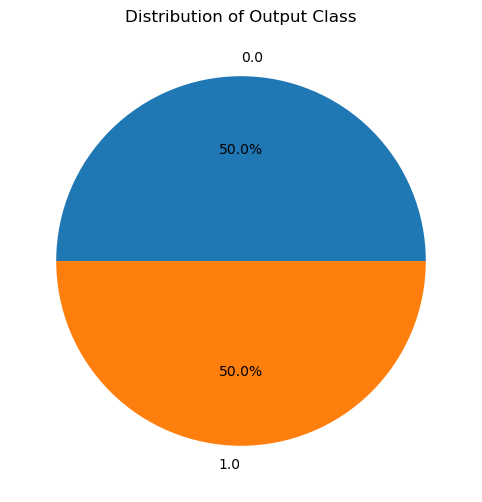

In [67]:
# checking the distribution of 'y_train_resampled' variable(output variable)
class_distribution = y_train_processed['Class'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Output Class')
plt.show()

## Feature selection: Training set

### (A) Pearson correlation matrix 

In [68]:
# Concatenate x_train_resampled and y_train_resampled into a single DataFrame

concatenate_df = pd.concat([x_train_processed, y_train_processed], axis=1)

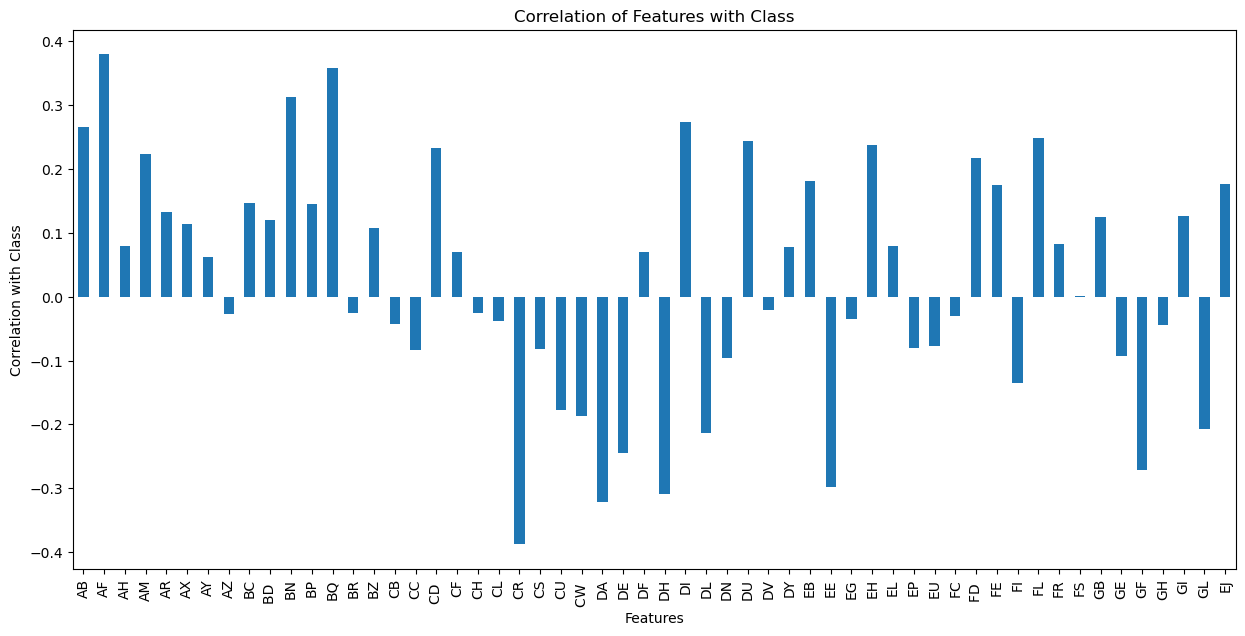

In [69]:
# Plotting the correlation between each feature & target variable 'class'

# Calculate correlation with Class
corr_with_class = concatenate_df.corr()['Class'].drop('Class')

plt.figure(figsize=(15, 7))
corr_with_class.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with Class')
plt.title('Correlation of Features with Class')
plt.show()

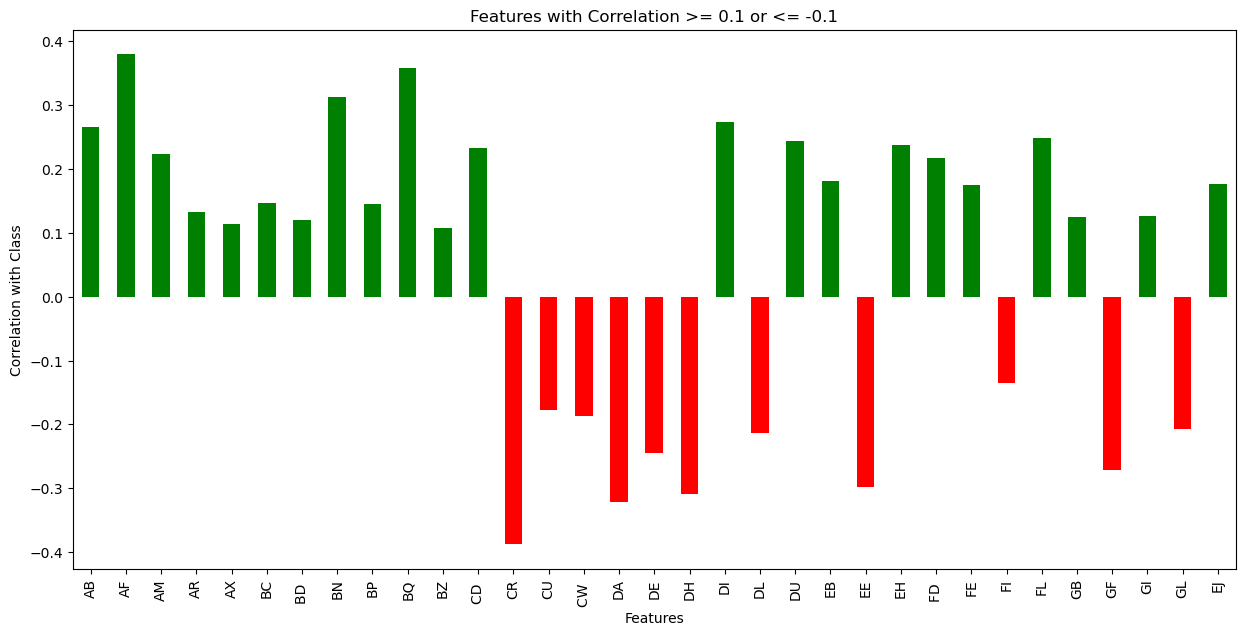

In [70]:
# Select features with correlation >= 0.1 or <= -0.1
selected_features = corr_with_class[(corr_with_class >= 0.1) | (corr_with_class <= -0.1)]

# Plot the selected features
plt.figure(figsize=(15, 7))
selected_features.plot(kind='bar', color=np.where(selected_features >= 0, 'green', 'red'))
plt.xlabel('Features')
plt.ylabel('Correlation with Class')
plt.title('Features with Correlation >= 0.1 or <= -0.1')
plt.show()

In [71]:
# Printing the selected features

selected_columns = selected_features.index.tolist()
print("Selected Columns:")
print(selected_columns)

Selected Columns:
['AB', 'AF', 'AM', 'AR', 'AX', 'BC', 'BD ', 'BN', 'BP', 'BQ', 'BZ', 'CD ', 'CR', 'CU', 'CW ', 'DA', 'DE', 'DH', 'DI', 'DL', 'DU', 'EB', 'EE', 'EH', 'FD ', 'FE', 'FI', 'FL', 'GB', 'GF', 'GI', 'GL', 'EJ']


In [72]:
len(selected_columns)

33

### (B) K-Best Method

In [73]:
from sklearn.feature_selection import SelectKBest, f_classif

# Number of top features to select
k = 25

# Create the feature selector
selector = SelectKBest(score_func=f_classif, k=k)

# Perform feature selection
x_train_selected = selector.fit_transform(x_train_processed, y_train_processed)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the column names of the selected features
selected_feature_names = [x_train_processed.columns[idx] for idx in selected_feature_indices]

# Print the column names of the selected features
print("Selected column names:")
for name in selected_feature_names:
    print(name)

Selected column names:
AB
AF
AM
BC
BN
BQ
CD 
CR
CU
CW 
DA
DE
DH
DI
DL
DU
EB
EE
EH
FD 
FE
FL
GF
GL
EJ


### Feature Selection: Top 20 in both

In [74]:
# Convert the selected columns lists to sets

Pearson_corr = set(selected_columns)
Kbest = set(selected_feature_names)

# Find the common elements
common_elements = Pearson_corr.intersection(Kbest)

# Print the common elements
print("Common elements:", common_elements)

Common elements: {'EE', 'GF', 'DL', 'DH', 'FD ', 'GL', 'FL', 'FE', 'BQ', 'DE', 'CD ', 'EJ', 'CU', 'AM', 'EH', 'CW ', 'CR', 'DU', 'DI', 'AF', 'BN', 'DA', 'EB', 'BC', 'AB'}


In [75]:
# List of columns which are most related to target variable

common_columns = sorted(list(common_elements))
print("Common columns:", common_elements)

Common columns: {'EE', 'GF', 'DL', 'DH', 'FD ', 'GL', 'FL', 'FE', 'BQ', 'DE', 'CD ', 'EJ', 'CU', 'AM', 'EH', 'CW ', 'CR', 'DU', 'DI', 'AF', 'BN', 'DA', 'EB', 'BC', 'AB'}


In [76]:
len(common_columns)

25

In [77]:
if isinstance(x_train_processed, pd.DataFrame):
    print("yes")
else:
    print("no")

yes


In [78]:
# Filter the DataFrame columns
x_train_filtered = x_train_processed[common_columns]

# Print the filtered DataFrame
x_train_filtered.head()

,AB,AF,AM,BC,BN,BQ,CD,CR,CU,CW,DA,DE,DH,DI,DL,DU,EB,EE,EH,EJ,FD,FE,FL,GF,GL
0,-0.578847,-0.813207,-0.485677,-0.106195,-0.946420,-0.991933,-0.739397,-0.656098,0.185218,-1.327523,-0.165398,-0.254580,0.736573,0.337447,-0.440000,-0.217917,-0.514413,-1.085553,-0.427051,-1.334408,-0.379963,3.917970,-0.480085,0.402761,1.301265
1,0.154287,1.373691,-0.197105,-0.106195,0.268795,-1.016493,-0.641582,-0.722531,-0.008372,0.748316,0.751784,-0.809338,-1.038729,0.248368,-0.634861,-0.217917,-0.369712,0.903865,-0.427051,-1.334408,-0.379963,2.328843,-0.480085,-0.755450,1.301265
2,-0.527698,0.103716,-0.426589,-0.106195,0.876402,1.184260,-0.390058,-0.273908,0.443338,-1.327523,0.507370,-0.895136,-0.211876,-0.391073,0.548620,0.011326,0.244356,-0.799612,0.445951,0.749396,0.190773,4.684170,-0.006608,-0.669144,-0.815500
3,-0.433925,0.772965,-0.401710,-0.090624,0.775134,-0.997453,-0.960002,-0.856721,-1.438786,-0.428232,2.004963,-0.855011,-1.306240,-0.114855,-0.594843,0.220964,0.775130,0.350235,0.533880,0.749396,0.448904,2.767541,0.383630,-0.629923,-0.822730
4,-0.050308,-0.519493,0.029572,-0.106195,-0.440081,-0.750640,0.115519,0.421128,-0.793486,-1.327523,-1.299858,0.858791,-0.673941,-0.616229,-0.127236,-0.125521,-0.698026,0.565198,-0.295159,0.749396,-0.328584,-0.578600,-0.225156,-0.740521,-0.825925


In [79]:
#Checking Shape of training & vValidation sets:

print('Shape of training set with all features :', x_train_processed.shape)
print('Shape of training set with best features :', x_train_filtered.shape)
print('Shape of training set (target):', y_train_processed.shape)
print('Shape of validation set:', x_valid_processed.shape)
print('Shape of validation set (target) :', y_valid_processed.shape)


Shape of training set with all features : (712, 56)
Shape of training set with best features : (712, 25)
Shape of training set (target): (712, 1)
Shape of validation set: (186, 56)
Shape of validation set (target) : (186,)


### Building models, Hypertuning & Evaluating

In [80]:
# importing evaluating parameters from sklearn library.

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report

### (A) Support Vector Machines 

In [81]:
# importing required libraries for SVM:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold

In [82]:
# Hyperparameter Tuning using GridSearchCV with k-fold Cross-Validation:

# Create the SVM model
model_SVM = SVC()

# Define the hyperparameter grid
param_grid_SVM = {
    'C': [0.1, 1, 10],                                  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],     # Kernel type (linear or radial basis function)
    'gamma': [0.001, 0.01, 0.1],                        # Kernel coefficient for 'rbf'
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.5],
}

# Create k-fold cross-validation object (here, k=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with k-fold cross-validation
grid_search_SVM = GridSearchCV(model_SVM, param_grid_SVM, cv=kfold)

In [83]:
# Perform grid search with k-fold cross-validation to find the best hyperparameters

grid_search_SVM.fit(x_train_filtered, y_train_processed)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'coef0': [0.0, 0.5],
                         'degree': [2, 3, 4], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [84]:
# Retrieve the best model with optimized hyperparameters

best_model_SVM = grid_search_SVM.best_estimator_
best_params_SVM = grid_search_SVM.best_params_
print(best_params_SVM)

{'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}


In [85]:
# Train the best model on the full training set
best_model_SVM.fit(x_train_filtered, y_train_processed)

SVC(C=10, degree=2, gamma=0.1)

In [86]:
# Assuming x_train_filtered.columns and x_valid_processed.columns are not in the same order
x_valid_processed = x_valid_processed.reindex(columns=x_train_filtered.columns)

In [87]:
# Checking the order of columns of training & validation:

print("Columns in x_train_filtered:", x_train_filtered.columns)
print("Columns in x_valid_processed:", x_valid_processed.columns)

Columns in x_train_filtered: Index(['AB', 'AF', 'AM', 'BC', 'BN', 'BQ', 'CD ', 'CR', 'CU', 'CW ', 'DA',
       'DE', 'DH', 'DI', 'DL', 'DU', 'EB', 'EE', 'EH', 'EJ', 'FD ', 'FE', 'FL',
       'GF', 'GL'],
      dtype='object')
Columns in x_valid_processed: Index(['AB', 'AF', 'AM', 'BC', 'BN', 'BQ', 'CD ', 'CR', 'CU', 'CW ', 'DA',
       'DE', 'DH', 'DI', 'DL', 'DU', 'EB', 'EE', 'EH', 'EJ', 'FD ', 'FE', 'FL',
       'GF', 'GL'],
      dtype='object')


In [88]:
# Make predictions on the test set
y_pred_SVM = best_model_SVM.predict(x_valid_processed)

In [89]:
# Evaluate the model using accuracy and classification report
accuracy_SVM = accuracy_score(y_valid_processed, y_pred_SVM)
accuracy_percentage_SVM = accuracy_SVM * 100

# Print the accuracy
print("Accuracy of SVM Model: {:.2f}%".format(accuracy_percentage_SVM))

# Convert the classification report string to a DataFrame
classification_report_SVM = classification_report(y_valid_processed, y_pred_SVM, output_dict=True)
classification_report_SVM_df = pd.DataFrame(classification_report_SVM).transpose()

# Convert classification report values to percentages
classification_report_SVM_df.iloc[:, :-1] *= 100

# Print the classification report DataFrame
print("Support Vector Machine Classification Report:")
print(classification_report_SVM_df)

Accuracy of SVM Model: 86.56%
Support Vector Machine Classification Report:
              precision     recall   f1-score     support
0.0           90.000000  94.117647  92.012780  153.000000
1.0           65.384615  51.515152  57.627119   33.000000
accuracy      86.559140  86.559140  86.559140    0.865591
macro avg     77.692308  72.816399  74.819949  186.000000
weighted avg  85.632754  86.559140  85.912098  186.000000


### (B) Decision Tree Model

In [90]:
# Importing required libraries for DT:

from sklearn.tree import DecisionTreeClassifier

In [91]:
# Create the Decision Tree classifier
model_DT = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create k-fold cross-validation object (here, k=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with k-fold cross-validation
grid_search_DT = GridSearchCV(model_DT, param_grid_DT, cv=kfold)

In [92]:
# Perform grid search with k-fold cross-validation to find the best hyperparameters of DT Model

grid_search_DT.fit(x_train_filtered, y_train_processed)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [93]:
# Retrieve the best model with optimized hyperparameters: Decision Tree

best_model_DT = grid_search_DT.best_estimator_
best_params_DT = grid_search_DT.best_params_
print(best_params_DT)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [94]:
# Train the best model on the full training set
best_model_DT.fit(x_train_filtered, y_train_processed)

# Make predictions on the test set
y_pred_DT = best_model_DT.predict(x_valid_processed)

In [95]:
# Evaluate the model using accuracy and classification report
accuracy_DT = accuracy_score(y_valid_processed, y_pred_DT)
accuracy_percentage_DT = accuracy_DT * 100

# Print the accuracy
print("Accuracy of DT Model: {:.2f}%".format(accuracy_percentage_DT))

# Convert the classification report string to a DataFrame
classification_report_DT = classification_report(y_valid_processed, y_pred_DT, output_dict=True)
classification_report_DT_df = pd.DataFrame(classification_report_DT).transpose()

# Convert classification report values to percentages
classification_report_DT_df.iloc[:, :-1] *= 100

# Print the classification report DataFrame
print("Decision Tree Classification Report:")
print(classification_report_DT_df)

Accuracy of DT Model: 86.02%
Decision Tree Classification Report:
              precision     recall   f1-score     support
0.0           93.793103  88.888889  91.275168  153.000000
1.0           58.536585  72.727273  64.864865   33.000000
accuracy      86.021505  86.021505  86.021505    0.860215
macro avg     76.164844  80.808081  78.070016  186.000000
weighted avg  87.537915  86.021505  86.589469  186.000000


### (C) Random Forest Model

In [96]:
# importing required libraries for RF:

from sklearn.ensemble import RandomForestClassifier

In [97]:
# Create the Random Forest classifier
model_RF = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid_RF = {
    'n_estimators': [300], # Number of trees in the forest
    'criterion': ['gini'],
    'max_depth': [30],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
}

# Create k-fold cross-validation object (here, k=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with k-fold cross-validation
grid_search_RF = GridSearchCV(model_RF, param_grid_RF, cv=kfold)

In [98]:
# Perform grid search with k-fold cross-validation to find the best hyperparameters of the Random Forest Model

grid_search_RF.fit(x_train_filtered, y_train_processed)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [30],
                         'min_samples_leaf': [2], 'min_samples_split': [5],
                         'n_estimators': [300]})

In [99]:
# Retrieve the best model with optimized hyperparameters: Random Forest

best_model_RF = grid_search_RF.best_estimator_
best_params_RF = grid_search_RF.best_params_
print(best_params_RF)

{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [100]:
# Train the best model on the full training set
best_model_RF.fit(x_train_filtered, y_train_processed)

# Make predictions on the test set
y_pred_RF = best_model_RF.predict(x_valid_processed)

In [101]:
# Evaluate the model using accuracy and classification report
accuracy_RF = accuracy_score(y_valid_processed, y_pred_RF)
accuracy_percentage_RF = accuracy_RF * 100

# Print the accuracy
print("Accuracy of Random Forest Model: {:.2f}%".format(accuracy_percentage_RF))

# Convert the classification report string to a DataFrame
classification_report_RF = classification_report(y_valid_processed, y_pred_RF, output_dict=True)
classification_report_RF_df = pd.DataFrame(classification_report_RF).transpose()

# Convert classification report values to percentages
classification_report_RF_df.iloc[:, :-1] *= 100

# Print the classification report DataFrame
print("Random Forest Classification Report:")
print(classification_report_RF_df)

Accuracy of Random Forest Model: 90.32%
Random Forest Classification Report:
              precision     recall   f1-score     support
0.0           95.918367  92.156863  94.000000  153.000000
1.0           69.230769  81.818182  75.000000   33.000000
accuracy      90.322581  90.322581  90.322581    0.903226
macro avg     82.574568  86.987522  84.500000  186.000000
weighted avg  91.183471  90.322581  90.629032  186.000000


### (D) Logistic Regression Model

In [102]:
# Importing required libraries for logistic regression:

from sklearn.linear_model import LogisticRegression

In [103]:
# Create the Logistic Regression classifier
model_LR = LogisticRegression(random_state=42)

# Define the hyperparameter grid
param_grid_LR = {
    'C': [0.1, 1.0, 10.0],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'], # Regularization type (L1 or L2)
    'solver': ['liblinear', 'saga'] # Solver to use for optimization (depending on the regularization)
}

# Create k-fold cross-validation object (here, k=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with k-fold cross-validation
grid_search_LR = GridSearchCV(model_LR, param_grid_LR, cv=kfold)

In [104]:
# Perform grid search with k-fold cross-validation to find the best hyperparameters of the Logistic Regression Model

grid_search_LR.fit(x_train_filtered, y_train_processed)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [105]:
# Retrieve the best model with optimized hyperparameters: Logistic Regression

best_model_LR = grid_search_LR.best_estimator_
best_params_LR = grid_search_LR.best_params_
print(best_params_LR)

{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [106]:
# Train the best model on the full training set
best_model_LR.fit(x_train_filtered, y_train_processed)

# Make predictions on the test set
y_pred_LR = best_model_LR.predict(x_valid_processed)

In [107]:
# Evaluate the model using accuracy and classification report
accuracy_LR = accuracy_score(y_valid_processed, y_pred_LR)
accuracy_percentage_LR = accuracy_LR * 100

# Print the accuracy
print("Accuracy of Logistic Regression Model: {:.2f}%".format(accuracy_percentage_LR))

# Convert the classification report string to a DataFrame
classification_report_LR = classification_report(y_valid_processed, y_pred_LR, output_dict=True)
classification_report_LR_df = pd.DataFrame(classification_report_LR).transpose()

# Convert classification report values to percentages
classification_report_LR_df.iloc[:, :-1] *= 100

# Print the classification report DataFrame
print("Logistic Regression Classification Report:")
print(classification_report_LR_df)

Accuracy of Logistic Regression Model: 86.02%
Logistic Regression Classification Report:
              precision     recall   f1-score     support
0.0           95.035461  87.581699  91.156463  153.000000
1.0           57.777778  78.787879  66.666667   33.000000
accuracy      86.021505  86.021505  86.021505    0.860215
macro avg     76.406619  83.184789  78.911565  186.000000
weighted avg  88.425227  86.021505  86.811499  186.000000


### (E) K-Nearest Neighbors Model (KNN)

In [108]:
# Importing required libraries for KNN:

from sklearn.neighbors import KNeighborsClassifier

In [109]:
# Create the K-Nearest Neighbors classifier
model_KNN = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid_KNN = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski distance
}

# Create k-fold cross-validation object (here, k=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with k-fold cross-validation
grid_search_KNN = GridSearchCV(model_KNN, param_grid_KNN, cv=kfold)

In [110]:
# Perform grid search with k-fold cross-validation to find the best hyperparameters

grid_search_KNN.fit(x_train_filtered, y_train_processed)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [111]:
# Retrieve the best model with optimized hyperparameters: K-Nearest Neighbors

best_model_KNN = grid_search_KNN.best_estimator_
best_params_KNN = grid_search_KNN.best_params_
print(best_params_KNN)

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [112]:
# Train the best model on the full training set
best_model_KNN.fit(x_train_filtered, y_train_processed)

# Make predictions on the test set
y_pred_KNN = best_model_KNN.predict(x_valid_processed)

In [113]:
# Evaluate the model using accuracy and classification report
accuracy_KNN = accuracy_score(y_valid_processed, y_pred_KNN)
accuracy_percentage_KNN = accuracy_KNN * 100

# Print the accuracy
print("Accuracy of K-Nearest Neighbors Model: {:.2f}%".format(accuracy_percentage_KNN))

# Convert the classification report string to a DataFrame
classification_report_KNN = classification_report(y_valid_processed, y_pred_KNN, output_dict=True)
classification_report_KNN_df = pd.DataFrame(classification_report_KNN).transpose()

# Convert classification report values to percentages
classification_report_KNN_df.iloc[:, :-1] *= 100

# Print the classification report DataFrame
print("K-Nearest Neighbors Classification Report:")
print(classification_report_KNN_df)

Accuracy of K-Nearest Neighbors Model: 84.95%
K-Nearest Neighbors Classification Report:
              precision     recall   f1-score     support
0.0           96.992481  84.313725  90.209790  153.000000
1.0           54.716981  87.878788  67.441860   33.000000
accuracy      84.946237  84.946237  84.946237    0.849462
macro avg     75.854731  86.096257  78.825825  186.000000
weighted avg  89.491989  84.946237  86.170319  186.000000


### (F) Naive Bayes Model

In [114]:
# Importing required libraries for NB:

from sklearn.naive_bayes import GaussianNB

In [115]:
# Create the Naive Bayes classifier
model_NB = GaussianNB()

In [116]:
# Train the Naive Bayes model on the training set
model_NB.fit(x_train_filtered, y_train_processed)

# Make predictions on the test set
y_pred_NB = model_NB.predict(x_valid_processed)

In [117]:
# Evaluate the model using accuracy and classification report
accuracy_NB = accuracy_score(y_valid_processed, y_pred_NB)
accuracy_percentage_NB = accuracy_NB * 100

# Print the accuracy
print("Accuracy of Naive Bayes Model: {:.2f}%".format(accuracy_percentage_NB))

# Convert the classification report string to a DataFrame
classification_report_NB = classification_report(y_valid_processed, y_pred_NB, output_dict=True)
classification_report_NB_df = pd.DataFrame(classification_report_NB).transpose()

# Convert classification report values to percentages
classification_report_NB_df.iloc[:, :-1] *= 100

# Print the classification report DataFrame
print("Naive Bayes Classification Report:")
print(classification_report_NB_df)

Accuracy of Naive Bayes Model: 87.63%
Naive Bayes Classification Report:
              precision     recall   f1-score     support
0.0           91.139241  94.117647  92.604502  153.000000
1.0           67.857143  57.575758  62.295082   33.000000
accuracy      87.634409  87.634409  87.634409    0.876344
macro avg     79.498192  75.846702  77.449792  186.000000
weighted avg  87.008546  87.634409  87.227024  186.000000


### (G) XGBoost Model

In [118]:
!pip install xgboost

In [119]:
# Importing required libraries for XGBoost:

import xgboost as xgb

In [120]:
# Create the XGBoost classifier

model_XGB = xgb.XGBClassifier(random_state=42)


# Define the hyperparameter grid

param_grid_XGB = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.1, 0.01, 0.001],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
}

# Create k-fold cross-validation object (here, k=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with k-fold cross-validation
grid_search_XGB = GridSearchCV(model_XGB, param_grid_XGB, cv=kfold)

In [121]:
# Perform grid search with k-fold cross-validation to find the best hyperparameters of the XGBoost Model

grid_search_XGB.fit(x_train_filtered, y_train_processed)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     int...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [122]:
# Retrieve the best model with optimized hyperparameters: XGBoost

best_model_XGB = grid_search_XGB.best_estimator_
best_params_XGB = grid_search_XGB.best_params_
print(best_params_XGB)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [123]:
# Train the best model on the full training set
best_model_XGB.fit(x_train_filtered, y_train_processed)

# Make predictions on the test set
y_pred_XGB = best_model_XGB.predict(x_valid_processed)

In [124]:
# Evaluate the model using accuracy and classification report
accuracy_XGB = accuracy_score(y_valid_processed, y_pred_XGB)
accuracy_percentage_XGB = accuracy_XGB * 100

# Print the accuracy
print("Accuracy of XGBoost Model: {:.2f}%".format(accuracy_percentage_XGB))

# Convert the classification report string to a DataFrame
classification_report_XGB = classification_report(y_valid_processed, y_pred_XGB, output_dict=True)
classification_report_XGB_df = pd.DataFrame(classification_report_XGB).transpose()

# Convert classification report values to percentages
classification_report_XGB_df.iloc[:, :-1] *= 100

# Print the classification report DataFrame
print("XGBoost Classification Report:")
print(classification_report_XGB_df)

Accuracy of XGBoost Model: 90.32%
XGBoost Classification Report:
              precision     recall   f1-score     support
0.0           95.918367  92.156863  94.000000  153.000000
1.0           69.230769  81.818182  75.000000   33.000000
accuracy      90.322581  90.322581  90.322581    0.903226
macro avg     82.574568  86.987522  84.500000  186.000000
weighted avg  91.183471  90.322581  90.629032  186.000000


### (H) Cat Boost Model

In [125]:
!pip install catboost

In [126]:
# Importing required libraries for Cat Boost:

from catboost import CatBoostClassifier

In [127]:
# Create the CatBoost classifier
model_CatBoost = CatBoostClassifier(random_seed=42, verbose=False)

# Define the hyperparameter grid
param_grid_CatBoost = {
    'iterations': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.1, 0.01, 0.001],  # Step size shrinkage to prevent overfitting
    'depth': [3, 5, 7],  # Maximum depth of a tree
}

# Create k-fold cross-validation object (here, k=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with k-fold cross-validation
grid_search_CatBoost = GridSearchCV(model_CatBoost, param_grid_CatBoost, cv=kfold)

In [128]:
# Perform grid search with k-fold cross-validation to find the best hyperparameters of the CatBoost Model

grid_search_CatBoost.fit(x_train_filtered, y_train_processed)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7a895ba0ea70>,
             param_grid={'depth': [3, 5, 7], 'iterations': [100, 200, 300],
                         'learning_rate': [0.1, 0.01, 0.001]})

In [129]:
# Retrieve the best model with optimized hyperparameters: CatBoost

best_model_CatBoost = grid_search_CatBoost.best_estimator_
best_params_CatBoost = grid_search_CatBoost.best_params_
print(best_params_CatBoost)

{'depth': 7, 'iterations': 200, 'learning_rate': 0.1}


In [130]:
# Train the best model on the full training set
best_model_CatBoost.fit(x_train_filtered, y_train_processed)

# Make predictions on the test set
y_pred_CatBoost = best_model_CatBoost.predict(x_valid_processed)

In [131]:
# Evaluate the model using accuracy and classification report
accuracy_CatBoost = accuracy_score(y_valid_processed, y_pred_CatBoost)
accuracy_percentage_CatBoost = accuracy_CatBoost * 100

# Print the accuracy
print("Accuracy of CatBoost Model: {:.2f}%".format(accuracy_percentage_CatBoost))

# Convert the classification report string to a DataFrame
classification_report_CatBoost = classification_report(y_valid_processed, y_pred_CatBoost, output_dict=True)
classification_report_CatBoost_df = pd.DataFrame(classification_report_CatBoost).transpose()

# Convert classification report values to percentages
classification_report_CatBoost_df.iloc[:, :-1] *= 100

# Print the classification report DataFrame
print("CatBoost Classification Report:")
print(classification_report_CatBoost_df)

Accuracy of CatBoost Model: 88.71%
CatBoost Classification Report:
              precision     recall   f1-score     support
0.0           95.205479  90.849673  92.976589  153.000000
1.0           65.000000  78.787879  71.232877   33.000000
accuracy      88.709677  88.709677  88.709677    0.887097
macro avg     80.102740  84.818776  82.104733  186.000000
weighted avg  89.846443  88.709677  89.118833  186.000000


### Comparing all the models on the basis of Accuracy:

In [132]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


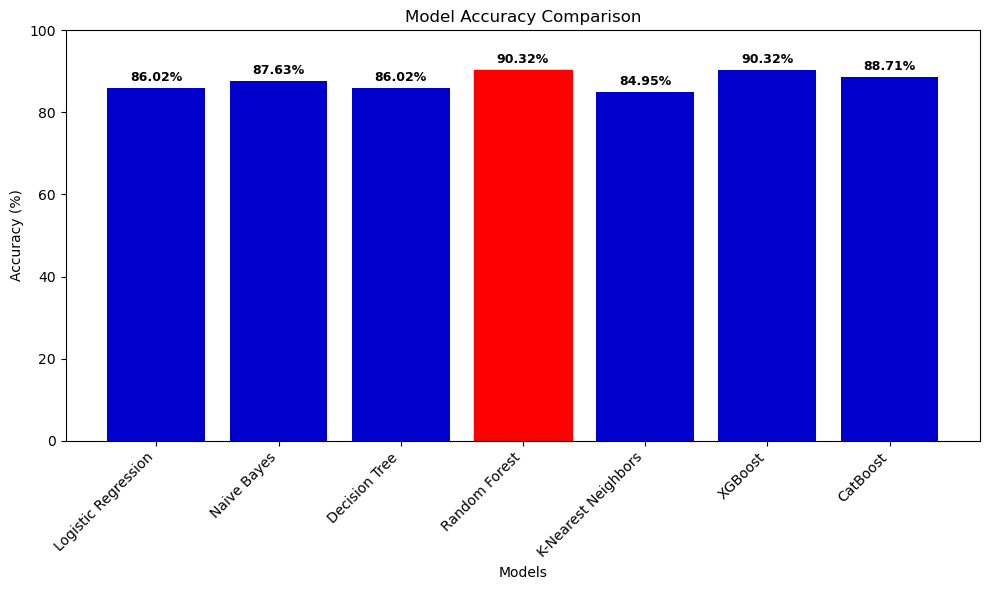

In [133]:
# List of model names and their corresponding accuracies
model_names = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'XGBoost', 'CatBoost']
accuracies = [accuracy_percentage_LR, accuracy_percentage_NB, accuracy_percentage_DT, accuracy_percentage_RF,accuracy_percentage_KNN, accuracy_percentage_XGB, accuracy_percentage_CatBoost]

# Find the index of the highest accuracy
highest_accuracy_index = np.argmax(accuracies)

# Plotting the accuracy of different models
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='MediumBlue')
plt.ylim(0, 100)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')

# Displaying the accuracy values above each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, "{:.2f}%".format(v), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Set a different color for the highest accuracy bar
bars[highest_accuracy_index].set_color('Red')

plt.tight_layout()
plt.show()

### Prediction on 'Test' Dataset:

In [134]:
# Checking the features of test dataset:

test_df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
# checking datatypes & null values of test dataset:

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5 non-null      object 
 1   AB      5 non-null      float64
 2   AF      5 non-null      float64
 3   AH      5 non-null      float64
 4   AM      5 non-null      float64
 5   AR      5 non-null      float64
 6   AX      5 non-null      float64
 7   AY      5 non-null      float64
 8   AZ      5 non-null      float64
 9   BC      5 non-null      float64
 10  BD      5 non-null      float64
 11  BN      5 non-null      float64
 12  BP      5 non-null      float64
 13  BQ      5 non-null      float64
 14  BR      5 non-null      float64
 15  BZ      5 non-null      float64
 16  CB      5 non-null      float64
 17  CC      5 non-null      float64
 18  CD      5 non-null      float64
 19  CF      5 non-null      float64
 20  CH      5 non-null      float64
 21  CL      5 non-null      float64
 22  CR    

In [136]:
# Dropping the column of id as not required:

test_x = test_df.drop("Id", axis = 1)
test_x.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
# Fit and transform the 'EJ' column in the train dataset
test_x['EJ'] = label_encoder.fit_transform(test_x['EJ'])

# Print the encoded DataFrame
test_x.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
# Assuming x_train.columns and test_x.columns are not in the same order

test_x = test_x.reindex(columns=x_train.columns)

In [139]:
# Scale the test_x data using the scaler
test_x_scaled = scaler.transform(test_x)

# Convert the scaled array back to a DataFrame
test_x_scaled_df = pd.DataFrame(test_x_scaled, columns=test_x.columns)

# Print the scaled DataFrame
test_x_scaled_df.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,EJ
0,-0.953938,-1.68874,-0.980614,-0.556082,-1.089497,-2.082763,-0.13559,-2.549916,-0.122038,-1.579278,-6.111085,-1.184475,-1.077923,-0.339968,-0.235943,-0.526381,-2.671424,-1.689007,-0.906916,-2.148923,-0.797822,-2.641951,-2.416079,-2.697119,-1.802673,-2.556235,-1.250301,-0.29423,-3.300414,-1.66411,-3.236556,-3.471453,-0.218693,-1.47925,-1.444573,-1.545561,-1.533729,-0.937579,-0.433332,-1.839692,-1.724393,-0.331081,-0.568678,-0.410914,-0.862248,-3.40328,-0.496826,-0.074137,-0.283943,-2.020124,-0.920747,-0.781901,-3.150813,-1.402969,-0.832533,-1.334408
1,-0.953938,-1.68874,-0.980614,-0.556082,-1.089497,-2.082763,-0.13559,-2.549916,-0.122038,-1.579278,-6.111085,-1.184475,-1.077923,-0.339968,-0.235943,-0.526381,-2.671424,-1.689007,-0.906916,-2.148923,-0.797822,-2.641951,-2.416079,-2.697119,-1.802673,-2.556235,-1.250301,-0.29423,-3.300414,-1.66411,-3.236556,-3.471453,-0.218693,-1.47925,-1.444573,-1.545561,-1.533729,-0.937579,-0.433332,-1.839692,-1.724393,-0.331081,-0.568678,-0.410914,-0.862248,-3.40328,-0.496826,-0.074137,-0.283943,-2.020124,-0.920747,-0.781901,-3.150813,-1.402969,-0.832533,-1.334408
2,-0.953938,-1.68874,-0.980614,-0.556082,-1.089497,-2.082763,-0.13559,-2.549916,-0.122038,-1.579278,-6.111085,-1.184475,-1.077923,-0.339968,-0.235943,-0.526381,-2.671424,-1.689007,-0.906916,-2.148923,-0.797822,-2.641951,-2.416079,-2.697119,-1.802673,-2.556235,-1.250301,-0.29423,-3.300414,-1.66411,-3.236556,-3.471453,-0.218693,-1.47925,-1.444573,-1.545561,-1.533729,-0.937579,-0.433332,-1.839692,-1.724393,-0.331081,-0.568678,-0.410914,-0.862248,-3.40328,-0.496826,-0.074137,-0.283943,-2.020124,-0.920747,-0.781901,-3.150813,-1.402969,-0.832533,-1.334408
3,-0.953938,-1.68874,-0.980614,-0.556082,-1.089497,-2.082763,-0.13559,-2.549916,-0.122038,-1.579278,-6.111085,-1.184475,-1.077923,-0.339968,-0.235943,-0.526381,-2.671424,-1.689007,-0.906916,-2.148923,-0.797822,-2.641951,-2.416079,-2.697119,-1.802673,-2.556235,-1.250301,-0.29423,-3.300414,-1.66411,-3.236556,-3.471453,-0.218693,-1.47925,-1.444573,-1.545561,-1.533729,-0.937579,-0.433332,-1.839692,-1.724393,-0.331081,-0.568678,-0.410914,-0.862248,-3.40328,-0.496826,-0.074137,-0.283943,-2.020124,-0.920747,-0.781901,-3.150813,-1.402969,-0.832533,-1.334408
4,-0.953938,-1.68874,-0.980614,-0.556082,-1.089497,-2.082763,-0.13559,-2.549916,-0.122038,-1.579278,-6.111085,-1.184475,-1.077923,-0.339968,-0.235943,-0.526381,-2.671424,-1.689007,-0.906916,-2.148923,-0.797822,-2.641951,-2.416079,-2.697119,-1.802673,-2.556235,-1.250301,-0.29423,-3.300414,-1.66411,-3.236556,-3.471453,-0.218693,-1.47925,-1.444573,-1.545561,-1.533729,-0.937579,-0.433332,-1.839692,-1.724393,-0.331081,-0.568678,-0.410914,-0.862248,-3.40328,-0.496826,-0.074137,-0.283943,-2.020124,-0.920747,-0.781901,-3.150813,-1.402969,-0.832533,-1.334408


In [140]:
# checking test_x_scaled_df dataframe

test_x_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      5 non-null      float64
 1   AF      5 non-null      float64
 2   AH      5 non-null      float64
 3   AM      5 non-null      float64
 4   AR      5 non-null      float64
 5   AX      5 non-null      float64
 6   AY      5 non-null      float64
 7   AZ      5 non-null      float64
 8   BC      5 non-null      float64
 9   BD      5 non-null      float64
 10  BN      5 non-null      float64
 11  BP      5 non-null      float64
 12  BQ      5 non-null      float64
 13  BR      5 non-null      float64
 14  BZ      5 non-null      float64
 15  CB      5 non-null      float64
 16  CC      5 non-null      float64
 17  CD      5 non-null      float64
 18  CF      5 non-null      float64
 19  CH      5 non-null      float64
 20  CL      5 non-null      float64
 21  CR      5 non-null      float64
 22  CS    

In [141]:
# Assuming x_train_filtered.columns and test_x_scaled_df.columns are not in the same order

test_x_scaled_df = test_x_scaled_df.reindex(columns=x_train_filtered.columns)

In [142]:
# Predicting the outputs on the features of test_x_scaled_df

test_predictions = best_model_RF.predict_proba(test_x_scaled_df)
test_preds = test_predictions[:, 1]
test_preds

array([0.3309246, 0.3309246, 0.3309246, 0.3309246, 0.3309246])

In [143]:
# Probability of the class to be 0 or 1 for the given test dataset:

sub_df = pd.DataFrame({'Id': test_df['Id'], 'Class_0': 1-test_preds, 'Class_1': test_preds})
sub_df.to_csv('test.csv', index=False)
sub_df.head()

,Id,Class_0,Class_1
0,00eed32682bb,0.669075,0.330925
1,010ebe33f668,0.669075,0.330925
2,02fa521e1838,0.669075,0.330925
3,040e15f562a2,0.669075,0.330925
4,046e85c7cc7f,0.669075,0.330925
